<a href="https://colab.research.google.com/github/dcw8161/Cluster-analysis-Zillow-Tarrant-County/blob/main/Zillow_Tarrant_County_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Zillow Tarrant County Raw Data.csv')
df.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
0,1,1,584,9,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,295850
1,1,1,612,57,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,216500
2,1,1,615,59,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,279900
3,1,1,618,22,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,379900
4,1,1,634,30,0,Apartment / Condo / Townhouse,Brick,NaN,0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,340000


In [ ]:
df.lot_size.value_counts()

0        352
11325     32
11761     31
10890     30
12196     27
        ... 
1281       1
1280       1
7422       1
2533       1
1057       1
Name: lot_size, Length: 763, dtype: int64

In [ ]:
df.columns

Index(['beds', 'baths', 'sqft', 'Age', 'lot_size', 'property_type',
       'exterior_walls', 'roof', 'basement', 'restaurants', 'groceries',
       'nightlife', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas',
       'active_life', 'median_age', 'married', 'college_grad', 'property_tax',
       'insurance', 'median_school', 'num_schools', 'Sales_price'],
      dtype='object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beds,1883.0,3.420605,1.068554,1.0,3.0,3.0,4.0,5.0
baths,1883.0,2.579926,0.945576,1.0,2.0,3.0,3.0,6.0
sqft,1883.0,2329.398832,1336.991858,500.0,1345.0,1907.0,3005.0,8450.0
Age,1883.0,39.036113,20.295945,7.0,22.0,36.0,52.0,142.0
lot_size,1883.0,13392.620287,44949.303601,0.0,1542.0,6098.0,11761.0,1220551.0
basement,1883.0,0.879979,0.325073,0.0,1.0,1.0,1.0,1.0
restaurants,1883.0,40.210303,46.867012,0.0,7.0,23.0,58.0,266.0
groceries,1883.0,4.505045,4.491029,0.0,1.0,3.0,7.0,24.0
nightlife,1883.0,5.074881,8.464668,0.0,0.0,2.0,6.0,54.0
cafes,1883.0,5.325013,7.539309,0.0,0.0,3.0,6.0,47.0


In [ ]:
df.isnull().sum()

beds                    0
baths                   0
sqft                    0
Age                     0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement                0
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
Sales_price             0
dtype: int64

In [ ]:
index = df.index
cols_missing = ['exterior_walls', 'roof']
missing = df[cols_missing].apply(lambda x: x.isnull().sum()/len(index))*100
missing

exterior_walls    11.842804
roof              18.799788
dtype: float64

In [ ]:
df1 = df.copy()
df1.shape

(1883, 25)

In [ ]:
df1.exterior_walls.value_counts()

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Block                    7
Concrete Block           7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

In [ ]:
df1.exterior_walls = df1.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood')
df1.exterior_walls = df1.exterior_walls.replace(['Brick veneer'], 'Brick')
df1.exterior_walls = df1.exterior_walls.replace(['Concrete', 'Concrete Block','Block', 'Asbestos shingle', 'Rock, Stone', 'Masonry'], 'Other')

In [ ]:
df1.exterior_walls.value_counts()

Brick                  735
Siding (Alum/Vinyl)    503
Wood                   123
Metal                  120
Combination            107
Other                   46
Stucco                  26
Name: exterior_walls, dtype: int64

In [ ]:
df1.roof.value_counts()

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Slate                       9
Asbestos                    9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

In [ ]:
df1.roof = df1.roof.replace(['asphalt,shake-shingle', 'asphalt'], 'Asphalt')
df1.roof = df1.roof.replace(['shake-shingle','Wood Shake/ Shingles'], 'Shake Shingle')
df1.roof = df1.roof.replace(['Roll Composition', 'Slate', 'Asbestos', 'Composition', 'composition', 'Metal', 'Built-up'], 'Other')

In [ ]:
df1.roof.value_counts()

Composition Shingle    1179
Asphalt                 138
Other                    94
Shake Shingle            88
Gravel/Rock              30
Name: roof, dtype: int64

In [ ]:
df1.dtypes

beds                    int64
baths                   int64
sqft                    int64
Age                     int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement                int64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age              int64
married                 int64
college_grad            int64
property_tax            int64
insurance               int64
median_school         float64
num_schools             int64
Sales_price             int64
dtype: object

In [ ]:
df1.property_type.value_counts()

Single-Family                    1080
Apartment / Condo / Townhouse     803
Name: property_type, dtype: int64

In [ ]:
df1['exterior_walls'].fillna('Brick', inplace=True)
df1['roof'].fillna('Composition Shingle', inplace=True)

In [ ]:
df1.isnull().sum()

beds                  0
baths                 0
sqft                  0
Age                   0
lot_size              0
property_type         0
exterior_walls        0
roof                  0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
Sales_price           0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

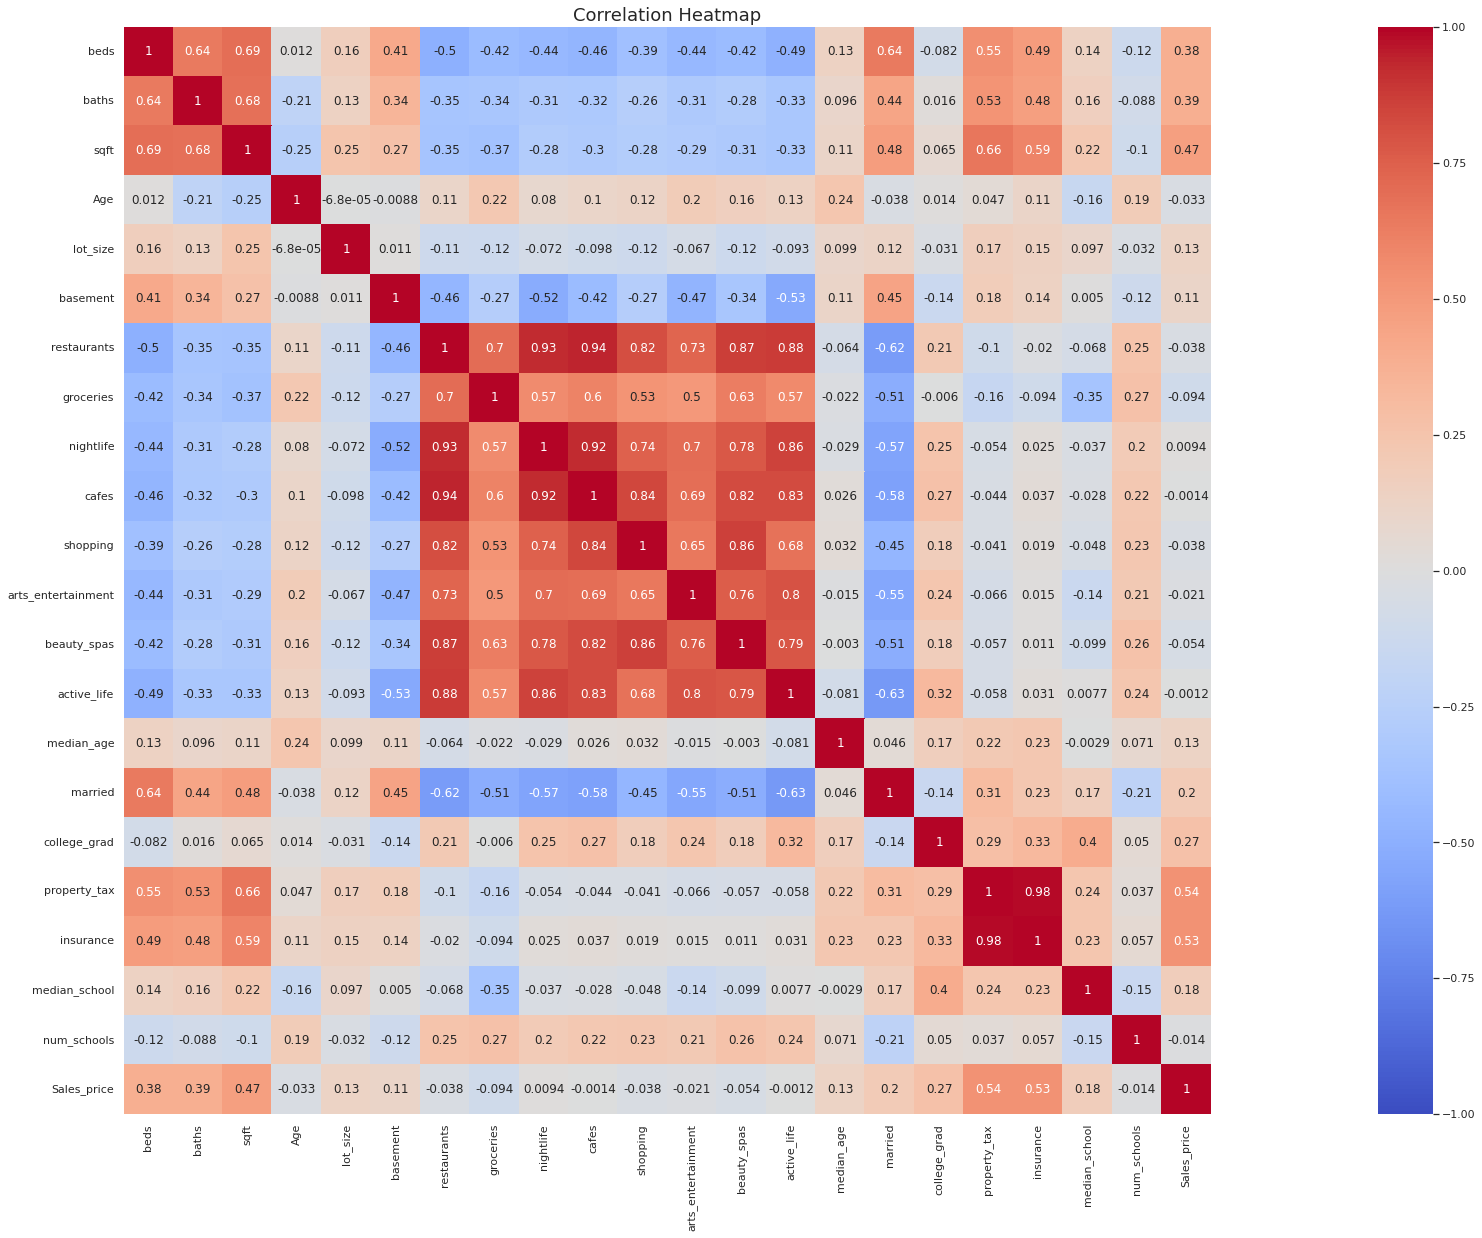

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60,20))
corr = df1.corr()
sns.set_theme(style ='white')
heat_map = sns.heatmap(corr,vmin = -1, vmax = 1, square = True, annot = True, cmap = 'coolwarm')
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':18} )

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df1)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.to_csv('Zillow_Regression.csv')
from google.colab import files
files.download('Zillow_Regression.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

groceries, beauty_spas, shopping, restaurants, Age, arts_entertainment, exterior_walls, num_schools have zero numerical and Categorical associations

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df1, 0.8) # choose 0.8 as threshold
len(set(corr_features))

6

In [ ]:
corr_features

{'active_life', 'beauty_spas', 'cafes', 'insurance', 'nightlife', 'shopping'}

In [ ]:
df1.drop(corr_features,axis=1, inplace=True)

In [ ]:
df1.columns

Index(['beds', 'baths', 'sqft', 'Age', 'lot_size', 'property_type',
       'exterior_walls', 'roof', 'basement', 'restaurants', 'groceries',
       'arts_entertainment', 'median_age', 'married', 'college_grad',
       'property_tax', 'median_school', 'num_schools', 'Sales_price'],
      dtype='object')

In [ ]:
colmns = ['groceries', 'restaurants', 'Age', 'arts_entertainment', 'exterior_walls', 'num_schools']
df1.drop(colmns,axis=1, inplace=True)

In [ ]:
df1.columns

Index(['beds', 'baths', 'sqft', 'lot_size', 'property_type', 'roof',
       'basement', 'median_age', 'married', 'college_grad', 'property_tax',
       'median_school', 'Sales_price'],
      dtype='object')

In [ ]:
cat_cols = ['roof',
            'property_type',
            'beds',
            'baths',
            'basement'
            ]

In [ ]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly_model = setup(df1)

,Description,Value
0,session_id,276
1,Original Data,"(1883, 13)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1883, 28)"
9,CPU Jobs,-1


In [ ]:
knn = create_model('knn')

In [ ]:
knn_predictions = predict_model(knn, data = df1)
knn_predictions

,beds,baths,sqft,lot_size,property_type,roof,basement,median_age,married,college_grad,property_tax,median_school,Sales_price,Anomaly,Anomaly_Score
0,1,1,584,0,Apartment / Condo / Townhouse,Composition Shingle,0,33,65,84,234,9.0,295850,0,1053.833004
1,1,1,612,0,Apartment / Condo / Townhouse,Composition Shingle,1,39,73,69,169,3.0,216500,0,1541.767492
2,1,1,615,0,Apartment / Condo / Townhouse,Composition Shingle,0,28,15,86,216,8.0,279900,0,511.191745
3,1,1,618,33541,Apartment / Condo / Townhouse,Composition Shingle,0,36,25,91,265,9.0,379900,0,8680.368713
4,1,1,634,0,Apartment / Condo / Townhouse,Composition Shingle,0,37,20,75,88,9.0,340000,0,1573.818287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,5,6,6381,224334,Single-Family,Composition Shingle,1,46,76,87,1250,10.0,385000,1,83879.113731
1879,5,6,6501,23086,Single-Family,Composition Shingle,1,42,73,61,1553,9.0,690000,0,10605.755183
1880,5,6,7064,217800,Single-Family,Composition Shingle,1,43,87,66,942,8.0,600000,1,90005.958725
1881,5,6,7500,8886,Single-Family,Asphalt,1,43,61,51,803,5.0,759900,0,7099.023736


In [ ]:
knn_predictions.Anomaly.value_counts()

0    1798
1      85
Name: Anomaly, dtype: int64

In [ ]:
knn_predictions.shape

(1883, 15)

In [ ]:
df1 = knn_predictions.loc[knn_predictions["Anomaly"] == 0]
df1.shape

(1798, 15)

In [ ]:
df1=df1.drop(columns=['Anomaly', 'Anomaly_Score'])
df1.shape

(1798, 13)

In [ ]:
#To import all Classification related Pycaret libraries
from pycaret.regression import *

In [ ]:
# Setting up the classification ML experiment
regression_model_setup = setup(df1, target = 'Sales_price', normalize = True, 
                                   remove_outliers = True,
                                   categorical_features= cat_cols, 
                                   transformation_method='quantile',  
                                   train_size = 0.7)

,Description,Value
0,session_id,8957
1,Target,Sales_price
2,Original Data,"(1798, 13)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1195, 22)"


In [ ]:
# Running the multiple algorithms
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,86917.5640,1.238286e+10,110911.1829,0.4174,0.2661,0.2283,0.085
gbr,Gradient Boosting Regressor,82779.4256,1.245274e+10,111197.7698,0.4147,0.2661,0.2193,0.173
rf,Random Forest Regressor,84257.5550,1.246315e+10,111144.7907,0.4136,0.2667,0.2229,0.802
et,Extra Trees Regressor,85974.0484,1.287691e+10,112841.6294,0.3928,0.2706,0.2284,0.651
lightgbm,Light Gradient Boosting Machine,87823.2952,1.367985e+10,116444.2132,0.3565,0.2781,0.2310,0.111
br,Bayesian Ridge,89970.8896,1.370147e+10,116639.0582,0.3553,0.2746,0.2359,0.015
omp,Orthogonal Matching Pursuit,89573.0931,1.375463e+10,116898.2544,0.3527,0.2728,0.2345,0.014
ridge,Ridge Regression,89963.8414,1.376394e+10,116903.5531,0.3523,0.2748,0.2358,0.014
llar,Lasso Least Angle Regression,89963.3310,1.376732e+10,116917.5704,0.3521,0.2748,0.2358,0.018
lr,Linear Regression,89969.8449,1.376897e+10,116924.5793,0.3520,0.2748,0.2358,0.299


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=8957)

In [ ]:
# Creating the model with the best algorithm based on the above results
model = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,106195.4117,1.801311e+10,134212.9246,0.3287,0.3062,0.2618
1,77193.2303,9.904464e+09,99521.1759,0.4646,0.2521,0.2152
2,92554.3615,1.330587e+10,115351.0616,0.3963,0.2836,0.2538
3,89236.1228,1.337740e+10,115660.7291,0.3462,0.2707,0.2274
4,80956.4890,1.102415e+10,104995.9555,0.5017,0.2415,0.1957
5,81866.9697,1.149078e+10,107195.0561,0.3299,0.2646,0.2277
6,88232.3071,1.193811e+10,109261.6809,0.4477,0.2776,0.2519
7,85572.8473,1.183611e+10,108793.9035,0.4567,0.2644,0.2218
8,87667.2547,1.205705e+10,109804.5784,0.4101,0.2604,0.2270
9,79700.6465,1.088157e+10,104314.7632,0.4924,0.2399,0.2002


In [ ]:
# Method 2 - Installing the H2O AI Package for Advanced ML and Deep Learning packages
!pip install h2o

     |████████████████████████████████| 175.8 MB 28 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.7-py2.py3-none-any.whl size=175908084 sha256=f17c3cfea752717128dc84014be99083a8fd7b1ffa9cee30ec87885df8767d4a
  Stored in directory: /root/.cache/pip/wheels/df/df/05/1f2ac68a5d9bf38b74f2b8218443b2c00f1a5f4f3154ec11b6
Successfully built h2o


In [ ]:
# Importing into current Working Session
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initializing the H2O Server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppgnkolyq
  JVM stdout: /tmp/tmppgnkolyq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppgnkolyq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_41y5ic
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf = h2o.H2OFrame(df1)
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


beds,baths,sqft,lot_size,property_type,roof,basement,median_age,married,college_grad,property_tax,median_school,Sales_price
1,1,584,0,Apartment / Condo / Townhouse,Composition Shingle,0,33,65,84,234,9,295850
1,1,612,0,Apartment / Condo / Townhouse,Composition Shingle,1,39,73,69,169,3,216500
1,1,615,0,Apartment / Condo / Townhouse,Composition Shingle,0,28,15,86,216,8,279900
1,1,618,33541,Apartment / Condo / Townhouse,Composition Shingle,0,36,25,91,265,9,379900
1,1,634,0,Apartment / Condo / Townhouse,Composition Shingle,0,37,20,75,88,9,340000
1,1,641,0,Apartment / Condo / Townhouse,Composition Shingle,0,28,15,86,168,8,265000
1,1,642,0,Single-Family,Composition Shingle,0,28,36,88,176,7,240000
1,1,650,33541,Apartment / Condo / Townhouse,Composition Shingle,0,36,25,91,266,9,388100
1,1,660,0,Apartment / Condo / Townhouse,Composition Shingle,0,36,49,77,188,6,240000
1,1,664,0,Apartment / Condo / Townhouse,Composition Shingle,0,57,13,83,147,6,250000


In [ ]:
# Splitting the data to train and test
splits = hf.split_frame(ratios = [0.8])
# Assigning first split to train variable
train = splits[0]
# Assigning first split to test variable
test = splits[1]

In [ ]:
# Invoking the Auto advanced ML and Deep learning algorithms restricting run time to 60 seconds
aml = H2OAutoML(max_runtime_secs = 60)
# Training using train data and testing with test data
aml.train(y = 'Sales_price', training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220123_60715

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 10773360370.185392
RMSE: 103794.79934074439
MAE: 78285.62564193027
RMSLE: 0.24851359932835732
R^2: 0.527530265853484
Mean Residual Deviance: 10773360370.185392
Null degrees of freedom: 1447
Residual degrees of freedom: 1443
Null deviance: 33017619306786.86
Residual deviance: 15599825816028.447
AIC: 37570.54163030608

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 12448993559.430014
RMSE: 111575.05796292474
MAE: 84150.36297670403
RMSLE: 0.2657258407515103
R^2: 0.4540447478492383
Mean Residual Deviance: 12448993559.430014
Null degrees of freedom: 1447
Residual degrees of freedom: 1443
Null deviance: 33041492341588.93


In [ ]:
# Displaying the best algorithm scores
aml.leaderboard.head(20)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20220123_60715,1.2449e+10,111575,1.2449e+10,84150.4,0.265726
StackedEnsemble_BestOfFamily_3_AutoML_1_20220123_60715,1.25213e+10,111898,1.25213e+10,84434.5,0.266533
GBM_1_AutoML_1_20220123_60715,1.25379e+10,111973,1.25379e+10,85119.3,0.267149
StackedEnsemble_BestOfFamily_1_AutoML_1_20220123_60715,1.25958e+10,112231,1.25958e+10,85043.1,0.267635
StackedEnsemble_AllModels_1_AutoML_1_20220123_60715,1.25963e+10,112233,1.25963e+10,84874.8,0.267408
StackedEnsemble_BestOfFamily_2_AutoML_1_20220123_60715,1.26277e+10,112373,1.26277e+10,85106,0.267781
DeepLearning_1_AutoML_1_20220123_60715,1.27924e+10,113104,1.27924e+10,84783.6,0.270507
GBM_2_AutoML_1_20220123_60715,1.31222e+10,114552,1.31222e+10,85626.9,0.270779
XGBoost_grid_1_AutoML_1_20220123_60715_model_5,1.33013e+10,115331,1.33013e+10,86791.2,0.274563
GBM_grid_1_AutoML_1_20220123_60715_model_2,1.33967e+10,115744,1.33967e+10,87033.5,0.27468


In [ ]:
# Getting the prediction metrics
perf = aml.leader.model_performance(test)
# Displaying the performance metrics
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 12640925407.819414
RMSE: 112431.87007169904
MAE: 85309.3755496448
RMSLE: 0.2727097491287997
R^2: 0.3800651908696845
Mean Residual Deviance: 12640925407.819414
Null degrees of freedom: 349
Residual degrees of freedom: 345
Null deviance: 7184315908168.44
Residual deviance: 4424323892736.795
AIC: 9146.328875713472
